# Problem Set 2: Part 3
## ISLR Chapter 3, Exercise 15

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

## read in the data
Boston = pd.read_csv("./Boston.csv")
Boston.shape
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Part A

In [50]:
mod1 = smf.ols(formula = 'crim ~ zn',data=Boston).fit()
mod2 = smf.ols(formula = 'crim ~ indus',data=Boston).fit()
mod3 = smf.ols(formula = 'crim ~ chas',data=Boston).fit()
mod4 = smf.ols(formula = 'crim ~ nox',data=Boston).fit()
mod5 = smf.ols(formula = 'crim ~ rm',data=Boston).fit()
mod6 = smf.ols(formula = 'crim ~ age',data=Boston).fit()
mod7 = smf.ols(formula = 'crim ~ dis',data=Boston).fit()
mod8 = smf.ols(formula = 'crim ~ rad',data=Boston).fit()
mod9 = smf.ols(formula = 'crim ~ tax',data=Boston).fit()
mod10 = smf.ols(formula = 'crim ~ ptratio',data=Boston).fit()
mod11 = smf.ols(formula = 'crim ~ black',data=Boston).fit()
mod12 = smf.ols(formula = 'crim ~ lstat',data=Boston).fit()
mod13 = smf.ols(formula = 'crim ~ medv',data=Boston).fit()

print mod1.pvalues
print mod2.pvalues
print mod3.pvalues
print mod4.pvalues
print mod5.pvalues
print mod6.pvalues
print mod7.pvalues
print mod8.pvalues
print mod9.pvalues
print mod10.pvalues
print mod11.pvalues
print mod12.pvalues
print mod13.pvalues


Intercept    4.037668e-24
zn           5.506472e-06
dtype: float64
Intercept    2.091266e-03
indus        1.450349e-21
dtype: float64
Intercept    1.239505e-19
chas         2.094345e-01
dtype: float64
Intercept    5.076814e-15
nox          3.751739e-23
dtype: float64
Intercept    2.272000e-09
rm           6.346703e-07
dtype: float64
Intercept    7.221718e-05
age          2.854869e-16
dtype: float64
Intercept    1.502748e-33
dis          8.519949e-19
dtype: float64
Intercept    3.605846e-07
rad          2.693844e-56
dtype: float64
Intercept    2.773600e-23
tax          2.357127e-47
dtype: float64
Intercept    3.395255e-08
ptratio      2.942922e-11
dtype: float64
Intercept    8.922239e-28
black        2.487274e-19
dtype: float64
Intercept    2.087022e-06
lstat        2.654277e-27
dtype: float64
Intercept    5.934119e-32
medv         1.173987e-19
dtype: float64


Above, simple linear models were created for each potential predictor. Since this resulted in the creation of 13 separate models, I chose not to print out a summary for each one here to save on space. However, looking solely at the p-values of each model, we see that each predictor is significant EXCEPT for the one with the variable 'chas'.

Let's look at the scatterplot of 'chas' vs. 'crim' as well as a plot of another variable that was indicated to have significance in its linear model, like 'lstat'.

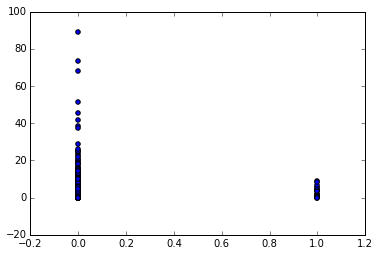

In [56]:
plt.scatter(Boston[[3]],Boston[[0]])

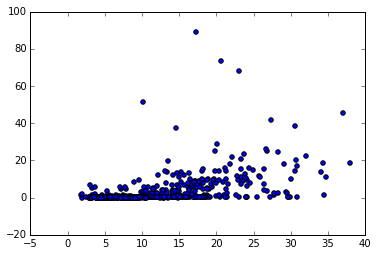

In [66]:
plt.scatter(Boston[[12]],Boston[[0]])

In the 'chas' plot, there appears to be small negative relationship between 'chas' and 'crim'. It's not exceedingly strong, however, because for both 0 and 1 values of 'chas', most of the output 'crim' values are fairly low, as evidenced by the point densities.

The second plot, showing 'lstat' vs. 'crim' exhibits a more obivious positive relationship. As 'lstat' increases, so does 'crim'.

### Part B

In [135]:
## multiple regression model using all predictors
mod_all = smf.ols(formula = 'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv',data=Boston).fit()
print mod_all.summary()

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           1.57e-56
Time:                        15:06:08   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

The linear model created from all of the predictors paints a different picture than all of the individual models separately. According to each predictor's significance in the full model, we would only end up keeping a few of them: 'zn', 'dis', 'rad', 'black', and 'medv'. The remaining seven predictors' significance do not reach the threshold of 0.05 required. 'nox' is close, but no cigar.

In other words, we would reject the null hypothesis of Beta-j = 0 for those five predictors, but fail to reject it for the other seven.

### Part C

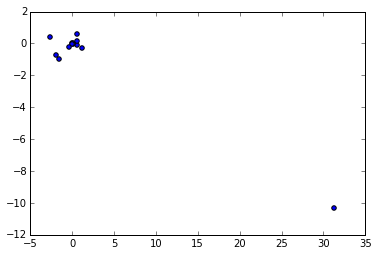

In [99]:
## plot coefficients from the simple linear models vs. their corresponding coefficients from the model containing all predictors
params_indiv = [mod1.params.zn,mod2.params.indus,mod3.params.chas,mod4.params.nox,mod5.params.rm,mod6.params.age,mod7.params.dis,mod8.params.rad,mod9.params.tax,mod10.params.ptratio,mod11.params.black,mod12.params.lstat,mod13.params.medv]
#print len(params_indiv)
params_all = [mod_all.params.zn,mod_all.params.indus,mod_all.params.chas,mod_all.params.nox,mod_all.params.rm,mod_all.params.age,mod_all.params.dis,mod_all.params.rad,mod_all.params.tax,mod_all.params.ptratio,mod_all.params.black,mod_all.params.lstat,mod_all.params.medv]
#print len(params_all)

plt.scatter(params_indiv,params_all)

### Part D

In [162]:
## fit non-linear model for each predictor
nl_mod1 = smf.ols(formula = 'crim ~ zn + I(zn**2) + I(zn**3)',data=Boston).fit()
nl_mod2 = smf.ols(formula = 'crim ~ indus + I(indus**2) + I(indus**3)',data=Boston).fit()
nl_mod3 = smf.ols(formula = 'crim ~ chas + I(chas**2) + I(chas**3)',data=Boston).fit()
nl_mod4 = smf.ols(formula = 'crim ~ nox + I(nox**2) + I(nox**3)',data=Boston).fit()
nl_mod5 = smf.ols(formula = 'crim ~ rm + I(rm**2) + I(rm**3)',data=Boston).fit()
nl_mod6 = smf.ols(formula = 'crim ~ age + I(age**2) + I(age**3)',data=Boston).fit()
nl_mod7 = smf.ols(formula = 'crim ~ dis + I(dis**2) + I(dis**3)',data=Boston).fit()
nl_mod8 = smf.ols(formula = 'crim ~ rad + I(rad**2) + I(rad**3)',data=Boston).fit()
nl_mod9 = smf.ols(formula = 'crim ~ tax + I(tax**2) + I(tax**3)',data=Boston).fit()
nl_mod10 = smf.ols(formula = 'crim ~ ptratio + I(ptratio**2) + I(ptratio**3)',data=Boston).fit()
nl_mod11 = smf.ols(formula = 'crim ~ black + I(black**2) + I(black**3)',data=Boston).fit()
nl_mod12 = smf.ols(formula = 'crim ~ lstat + I(lstat**2) + I(lstat**3)',data=Boston).fit()
nl_mod13 = smf.ols(formula = 'crim ~ medv + I(medv**2) + I(medv**3)',data=Boston).fit()

#nl_mod1 = smf.OLS(Boston[[0]], np.column_stack((Boston[[1]],Boston[[1]]**2,Boston[[1]]**3))).fit()
#nl_mod2 = smf.OLS(Boston[[0]], np.column_stack((Boston[[2]],Boston[[2]]**2,Boston[[2]]**3))).fit()
#nl_mod3 = smf.OLS(Boston[[0]], np.column_stack((Boston[[3]],Boston[[3]]**2,Boston[[3]]**3))).fit()
#nl_mod4 = smf.OLS(Boston[[0]], np.column_stack((Boston[[4]],Boston[[4]]**2,Boston[[4]]**3))).fit()
#nl_mod5 = smf.OLS(Boston[[0]], np.column_stack((Boston[[5]],Boston[[5]]**2,Boston[[5]]**3))).fit()
#nl_mod6 = smf.OLS(Boston[[0]], np.column_stack((Boston[[6]],Boston[[6]]**2,Boston[[6]]**3))).fit()
#nl_mod7 = smf.OLS(Boston[[0]], np.column_stack((Boston[[7]],Boston[[7]]**2,Boston[[7]]**3))).fit()
#nl_mod8 = smf.OLS(Boston[[0]], np.column_stack((Boston[[8]],Boston[[8]]**2,Boston[[8]]**3))).fit()
#nl_mod9 = smf.OLS(Boston[[0]], np.column_stack((Boston[[9]],Boston[[9]]**2,Boston[[9]]**3))).fit()
#nl_mod10 = smf.OLS(Boston[[0]], np.column_stack((Boston[[10]],Boston[[10]]**2,Boston[[10]]**3))).fit()
#nl_mod11 = smf.OLS(Boston[[0]], np.column_stack((Boston[[11]],Boston[[11]]**2,Boston[[11]]**3))).fit()
#nl_mod12 = smf.OLS(Boston[[0]], np.column_stack((Boston[[12]],Boston[[12]]**2,Boston[[12]]**3))).fit()
#nl_mod13 = smf.OLS(Boston[[0]], np.column_stack((Boston[[13]],Boston[[13]]**2,Boston[[13]]**3))).fit()

## summaries of each model
print nl_mod1.summary()
print nl_mod2.summary()
# print nl_mod3.summary()  ## chas is a qualitative variable so no eligile for non-linear effect interpretation
print nl_mod4.summary()
print nl_mod5.summary()
print nl_mod6.summary()
print nl_mod7.summary()
print nl_mod8.summary()
print nl_mod9.summary()
print nl_mod10.summary()
print nl_mod11.summary()
print nl_mod12.summary()
print nl_mod13.summary()

## compare r-squared values from the non-linear models and the simple models
print "For variable 'zn':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod1.rsquared, mod1.rsquared)
print "For variable 'indus':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod2.rsquared, mod2.rsquared)
print "For variable 'chas', we cannot predict a non-linear effect because it is a factor/qualitative variable."
print "For variable 'nox':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod4.rsquared, mod4.rsquared)
print "For variable 'rm':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod5.rsquared, mod5.rsquared)
print "For variable 'age':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod6.rsquared, mod6.rsquared)
print "For variable 'dis':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod7.rsquared, mod7.rsquared)
print "For variable 'rad':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod8.rsquared, mod8.rsquared)
print "For variable 'tax':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod9.rsquared, mod9.rsquared)
print "For variable 'ptratio':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod10.rsquared, mod10.rsquared)
print "For variable 'black':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod11.rsquared, mod11.rsquared)
print "For variable 'lstat':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod12.rsquared, mod12.rsquared)
print "For variable 'medv':\n Non-linear model r-squared: \t%s \n Simple model r-squared: \t%s" % (nl_mod13.rsquared, mod13.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           1.28e-06
Time:                        16:08:13   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.0

For most of the predictors, we see evidence of a non-linear effect.

Also, we see that non-linear models may work better than a simple linear one. Observing the r-squared values, all of them exhibit a higher value with the non-linear model than the simple linear model.